# MODELOS DE MACHINE LEARNING/VIVIENDAS EN ALQUILER

## LIBRERIAS

Las librerias utilizadas en este proyecto son:

In [ ]:
# Tratamiento de datos
# ==============================================================================
import numpy as np
import pandas as pd
from tabulate import tabulate
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import matplotlib.ticker as ticker
import seaborn as sns


# Preprocesado y modelado
# ==============================================================================
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import RobustScaler
from sklearn.compose import make_column_selector
from sklearn.pipeline import Pipeline

# Varios
# ==============================================================================
import multiprocessing
import random

## DATOS

In [2]:
datos=pd.read_csv('df_Alquiler_final.csv')

In [3]:
datos.head()

,Unnamed: 0,id,url,subtype,transaction,owner,sell-type,provider,title,location,features,description,price,price2,m2,rooms,amueblado,parking,distrito,temporalidad,cambio_precio,baños
0,0,id2277003487234,https://www.habitaclia.com/alquiler-piso-de_100m2_con_dos_habitaciones_totalmente_amueblado_en_plaza_gotic-barcelona-i2277003487234.htm?f=&geo=d&coddists=100&from=list&lo=55,FLAT,RENT,PROFESSIONAL,SECOND_HAND,2277-2,Alquiler Piso Plaza del pí. Piso de 100m² con dos habitaciones totalmente amueblado en plaza,Barcelona - Gòtic,"103m2 - 2 habitaciones - 2 baños - 19,42€/m2",Piso de 100m² en Plaza del Pí con acceso a terraza comunitaria. La vivienda dispone de un amplio salón comedor exterio...,Oportunidad\n2.000 €\nha bajado 100 €,2000,103,2,No,No,Ciutat Vella,Indefinido,Si,2
1,1,id3974003524929,https://www.habitaclia.com/alquiler-piso-gotic-barcelona-i3974003524929.htm?f=&geo=d&coddists=100&from=list&lo=55,FLAT,RENT,PROFESSIONAL,SECOND_HAND,3974-1,Alquiler Piso Carrer de la mercè,Barcelona - Gòtic,"95m2 - 2 habitaciones - 2 baños - 20,00€/m2",EXCLUSIVIDAD - FINCA NUEVA - TERRAZA - PISCINA - WIFI - ALTO STANDING- Piso de 2 habitaciones en finca totalmente rehabi...,1.900 €\nha bajado 100 €,1900,95,2,Si,No,Ciutat Vella,Indefinido,Si,2
2,2,id1948004073754,https://www.habitaclia.com/alquiler-piso-con_2_habitaciones_amueblado_con_ascensor_calefaccion_y_ai_gotic-barcelona-i1948004073754.htm?f=&geo=d&coddists=100&from=list&lo=55,FLAT,RENT,PROFESSIONAL,SECOND_HAND,1948-1,"Alquiler Piso en Gòtic. Piso con 2 habitaciones amueblado con ascensor, calefacción y ai",Barcelona - Gòtic,"63m2 - 2 habitaciones - 1 baño - 33,33€/m2",Este apartamento cómodo de buenas dimensiones tiene todo lo que necesita para vivir en el casco antiguo de Barcelona. Ub...,2.100 €,2100,63,2,Si,No,Ciutat Vella,Indefinido,No,1
3,3,id27758000002114,https://www.habitaclia.com/alquiler-piso-de_temporal_de_1_habitacion_a_unos_pasos_del_mar_y_barceloneta-barcelona-i27758000002114.htm?f=&geo=d&coddists=100&from=list&lo=55,FLAT,RENT,PROFESSIONAL,SECOND_HAND,27758-1,Alquiler Piso Passeig de joan de borbó. Piso de alquiler temporal de 1 habitación a unos pasos del mar y,Barcelona - Barceloneta,"52m2 - 1 habitacion - 1 baño - 33,65€/m2",Apartamento de alquiler temporal (desde 32 días a 11 meses) Disponibilidad inmediata Este moderno piso de 52 m2 tien...,1.750 €,1750,52,1,No,No,Ciutat Vella,Temporal,No,1
4,4,id4737003817059,https://www.habitaclia.com/alquiler-piso-planta_baja_amueblada_de_tres_dormitorios_en_el_gotico_gotic-barcelona-i4737003817059.htm?f=&geo=d&coddists=100&from=list&lo=55,FLAT,RENT,PROFESSIONAL,SECOND_HAND,4737-1,Alquiler Piso en Gòtic. Planta baja amueblada de tres dormitorios en el gótico,Barcelona - Gòtic,"150m2 - 3 habitaciones - 1 baño - 13,33€/m2","Situado en una finca regia de El Gótico, cerca de la Plaza Real y La Rambla, se ubica esta planta baja amueblada de 150...",2.000 €,2000,150,3,Si,No,Ciutat Vella,Indefinido,No,1


In [4]:
datos.columns

Index(['Unnamed: 0', 'id', 'url', 'subtype', 'transaction', 'owner',
       'sell-type', 'provider', 'title', 'location', 'features', 'description',
       'price', 'price2', 'm2', 'rooms', 'amueblado', 'parking', 'distrito',
       'temporalidad', 'cambio_precio', 'baños'],
      dtype='object')

In [5]:
datos.drop(['Unnamed: 0','url', 'transaction', 'owner',
       'sell-type', 'provider', 'title', 'location', 'features', 'description',
       'price'],axis=1,inplace=True)

In [6]:
datos.head()

,id,subtype,price2,m2,rooms,amueblado,parking,distrito,temporalidad,cambio_precio,baños
0,id2277003487234,FLAT,2000,103,2,No,No,Ciutat Vella,Indefinido,Si,2
1,id3974003524929,FLAT,1900,95,2,Si,No,Ciutat Vella,Indefinido,Si,2
2,id1948004073754,FLAT,2100,63,2,Si,No,Ciutat Vella,Indefinido,No,1
3,id27758000002114,FLAT,1750,52,1,No,No,Ciutat Vella,Temporal,No,1
4,id4737003817059,FLAT,2000,150,3,Si,No,Ciutat Vella,Indefinido,No,1


In [7]:
datos.columns

Index(['id', 'subtype', 'price2', 'm2', 'rooms', 'amueblado', 'parking',
       'distrito', 'temporalidad', 'cambio_precio', 'baños'],
      dtype='object')

In [8]:
datos.columns=['id', 'tipo', 'precio', 'm2', 'dormitorios', 'amueblado', 'parking',
       'distrito', 'temporalidad', 'cambio_precio', 'baños']

In [9]:
datos.head()

,id,tipo,precio,m2,dormitorios,amueblado,parking,distrito,temporalidad,cambio_precio,baños
0,id2277003487234,FLAT,2000,103,2,No,No,Ciutat Vella,Indefinido,Si,2
1,id3974003524929,FLAT,1900,95,2,Si,No,Ciutat Vella,Indefinido,Si,2
2,id1948004073754,FLAT,2100,63,2,Si,No,Ciutat Vella,Indefinido,No,1
3,id27758000002114,FLAT,1750,52,1,No,No,Ciutat Vella,Temporal,No,1
4,id4737003817059,FLAT,2000,150,3,Si,No,Ciutat Vella,Indefinido,No,1


In [10]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3725 entries, 0 to 3724
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   id             3725 non-null   object
 1   tipo           3725 non-null   object
 2   precio         3725 non-null   int64 
 3   m2             3725 non-null   int64 
 4   dormitorios    3725 non-null   int64 
 5   amueblado      3725 non-null   object
 6   parking        3725 non-null   object
 7   distrito       3725 non-null   object
 8   temporalidad   3725 non-null   object
 9   cambio_precio  3725 non-null   object
 10  baños          3725 non-null   int64 
dtypes: int64(4), object(7)
memory usage: 320.2+ KB


In [11]:
datos.shape

(3725, 11)

In [12]:
datos.isna().sum().sort_values()

id               0
tipo             0
precio           0
m2               0
dormitorios      0
amueblado        0
parking          0
distrito         0
temporalidad     0
cambio_precio    0
baños            0
dtype: int64

## VARIABLE TARGET

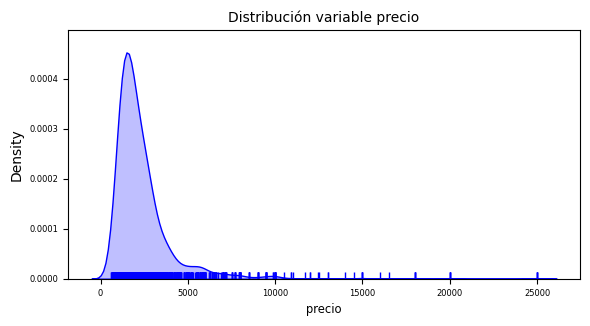

In [13]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(6, 6))
sns.kdeplot(
    datos.precio,
    fill    = True,
    color   = "blue",
    ax      = axes[0]
)
sns.rugplot(
    datos.precio,
    color   = "blue",
    ax      = axes[0]
)
axes[0].set_title("Distribución variable precio", fontsize = 'medium')
axes[0].set_xlabel('precio', fontsize='small') 
axes[0].tick_params(labelsize = 6)
    
# Se eliminan los axes vacíos
fig.delaxes(axes[1])

fig.tight_layout()

In [14]:
datos.select_dtypes(include=['float64', 'int64']).describe()

,precio,m2,dormitorios,baños
count,3725.000000,3725.000000,3725.000000,3725.000000
mean,2392.035973,98.616107,2.436242,1.675436
std,1945.115674,73.336549,1.221244,0.917458
min,600.000000,20.000000,0.000000,1.000000
25%,1390.000000,60.000000,2.000000,1.000000
50%,1895.000000,80.000000,2.000000,1.000000
75%,2700.000000,110.000000,3.000000,2.000000
max,25000.000000,970.000000,16.000000,9.000000


## VARIABLES NUMERICAS

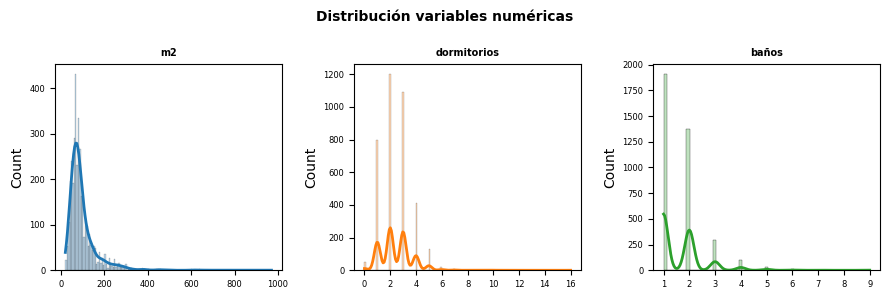

In [15]:
# Gráfico de distribución para cada variable numérica
# ==============================================================================
# Ajustar número de subplots en función del número de columnas
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(9, 3))
axes = axes.flat
columnas_numeric = datos.select_dtypes(include=['float64', 'int64']).columns
columnas_numeric = columnas_numeric.drop(['precio'])

for i, colum in enumerate(columnas_numeric):
    sns.histplot(
        data     = datos,
        x        = colum,
        stat     = "count",
        kde      = True,
        color    = (list(plt.rcParams['axes.prop_cycle'])*2)[i]["color"],
        line_kws = {'linewidth': 2},
        alpha    = 0.3,
        ax       = axes[i]
    )
    axes[i].set_title(colum, fontsize = 7, fontweight = "bold")
    axes[i].tick_params(labelsize = 6)
    axes[i].set_xlabel("")
    
    
fig.tight_layout()
plt.subplots_adjust(top = 0.8)
fig.suptitle('Distribución variables numéricas', fontsize = 10, fontweight = "bold");

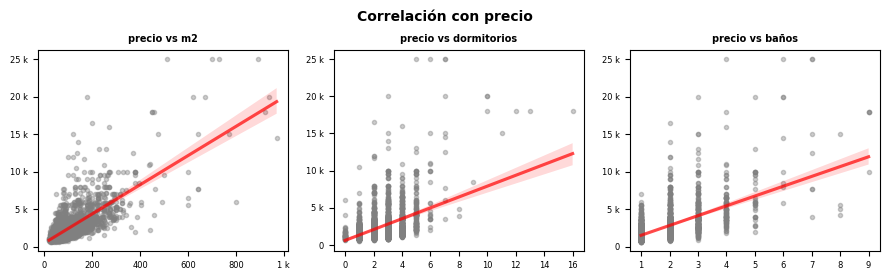

In [16]:
# Gráfico de distribución para cada variable numérica vs precio
# ==============================================================================
# Ajustar número de subplots en función del número de columnas
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(9, 5))
axes = axes.flat
columnas_numeric = datos.select_dtypes(include=['float64', 'int64']).columns
columnas_numeric = columnas_numeric.drop('precio')

for i, colum in enumerate(columnas_numeric):
    sns.regplot(
        x           = datos[colum],
        y           = datos['precio'],
        color       = "gray",
        marker      = '.',
        scatter_kws = {"alpha":0.4},
        line_kws    = {"color":"r","alpha":0.7},
        ax          = axes[i]
    )
    axes[i].set_title(f"precio vs {colum}", fontsize = 7, fontweight = "bold")
    #axes[i].ticklabel_format(style='sci', scilimits=(-4,4), axis='both')
    axes[i].yaxis.set_major_formatter(ticker.EngFormatter())
    axes[i].xaxis.set_major_formatter(ticker.EngFormatter())
    axes[i].tick_params(labelsize = 6)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")

# Se eliminan los axes vacíos
for i in [3,4,5]:
    fig.delaxes(axes[i])
    
fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Correlación con precio', fontsize = 10, fontweight = "bold");


In [17]:
# Correlación entre columnas numéricas
# ==============================================================================
def tidy_corr_matrix(corr_mat):
    '''
    Función para convertir una matrix de correlación de pandas en formato tidy
    '''
    corr_mat = corr_mat.stack().reset_index()
    corr_mat.columns = ['variable_1','variable_2','r']
    corr_mat = corr_mat.loc[corr_mat['variable_1'] != corr_mat['variable_2'], :]
    corr_mat['abs_r'] = np.abs(corr_mat['r'])
    corr_mat = corr_mat.sort_values('abs_r', ascending=False)
    
    return(corr_mat)

corr_matrix = datos.select_dtypes(include=['float64', 'int64']).corr(method='pearson')
tidy_corr_matrix(corr_matrix).head(10)

,variable_1,variable_2,r,abs_r
7,m2,baños,0.751476,0.751476
13,baños,m2,0.751476,0.751476
1,precio,m2,0.732794,0.732794
4,m2,precio,0.732794,0.732794
6,m2,dormitorios,0.675475,0.675475
9,dormitorios,m2,0.675475,0.675475
11,dormitorios,baños,0.667802,0.667802
14,baños,dormitorios,0.667802,0.667802
3,precio,baños,0.617319,0.617319
12,baños,precio,0.617319,0.617319


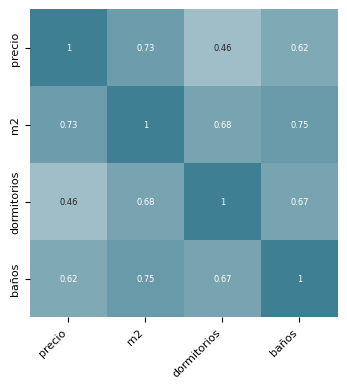

In [18]:
# Heatmap matriz de correlaciones
# ==============================================================================
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(4, 4))

sns.heatmap(
    corr_matrix,
    annot     = True,
    cbar      = False,
    annot_kws = {"size": 6},
    vmin      = -1,
    vmax      = 1,
    center    = 0,
    cmap      = sns.diverging_palette(20, 220, n=200),
    square    = True,
    ax        = ax
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation = 45,
    horizontalalignment = 'right',
)

ax.tick_params(labelsize = 8)


## VARIABLES CUALITATIVAS

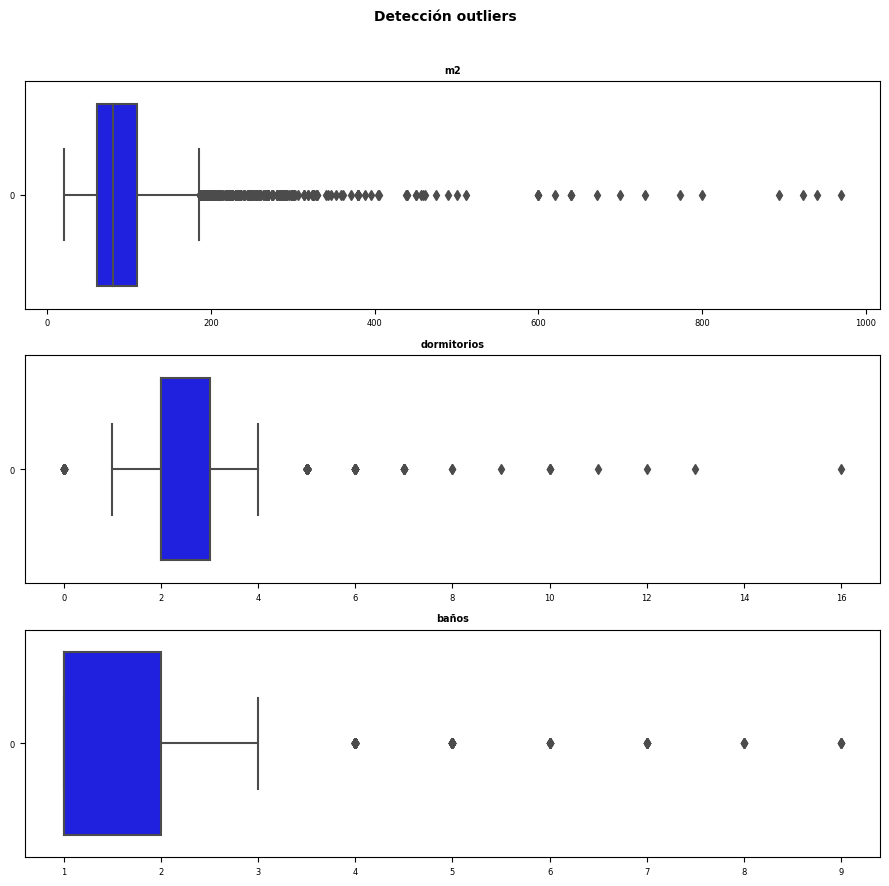

In [19]:
# Gráfico de distribución boxplot de cada variable cualitativa para detección outliers
# ==============================================================================
# Ajustar número de subplots en función del número de columnas
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(9, 9))
axes = axes.flat
columnas_object = datos.select_dtypes(include=['float64','int64']).columns
columnas_object = columnas_object.drop(['precio'])

for i, colum in enumerate(columnas_object):
    sns.boxplot(
        x     = colum,
        #y     = 'precio',
        data  = datos,
        color = 'blue',
        ax    = axes[i]
    )
    axes[i].set_title(f"{colum}", fontsize = 7, fontweight = "bold")
    axes[i].yaxis.set_major_formatter(ticker.EngFormatter())
    axes[i].tick_params(labelsize = 6)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")

# Se eliminan los axes vacíos
#for i in [6,7]:
    #fig.delaxes(axes[i])
    
fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Detección outliers', fontsize = 10, fontweight = "bold");

In [20]:
# Variables cualitativas (tipo object)
# ==============================================================================
datos.select_dtypes(include=['object']).describe()

,id,tipo,amueblado,parking,distrito,temporalidad,cambio_precio
count,3725,3725,3725,3725,3725,3725,3725
unique,3725,11,2,2,10,2,2
top,id2277003487234,FLAT,No,No,Eixample,Indefinido,No
freq,1,2721,1872,3344,1030,2570,3004


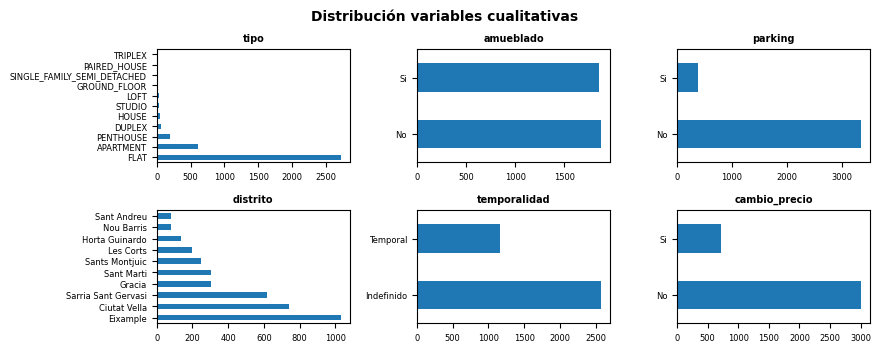

In [21]:
# Gráfico para cada variable cualitativa
# ==============================================================================
# Ajustar número de subplots en función del número de columnas
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(9, 5))
axes = axes.flat
columnas_object = datos.select_dtypes(include=['object']).columns
columnas_object = columnas_object.drop(['id'])

for i, colum in enumerate(columnas_object):
    datos[colum].value_counts().plot.barh(ax = axes[i])
    axes[i].set_title(colum, fontsize = 7, fontweight = "bold")
    axes[i].tick_params(labelsize = 6)
    axes[i].set_xlabel("")

# Se eliminan los axes vacíos
for i in [6,7, 8]:
    fig.delaxes(axes[i])
    
fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Distribución variables cualitativas',
             fontsize = 10, fontweight = "bold");


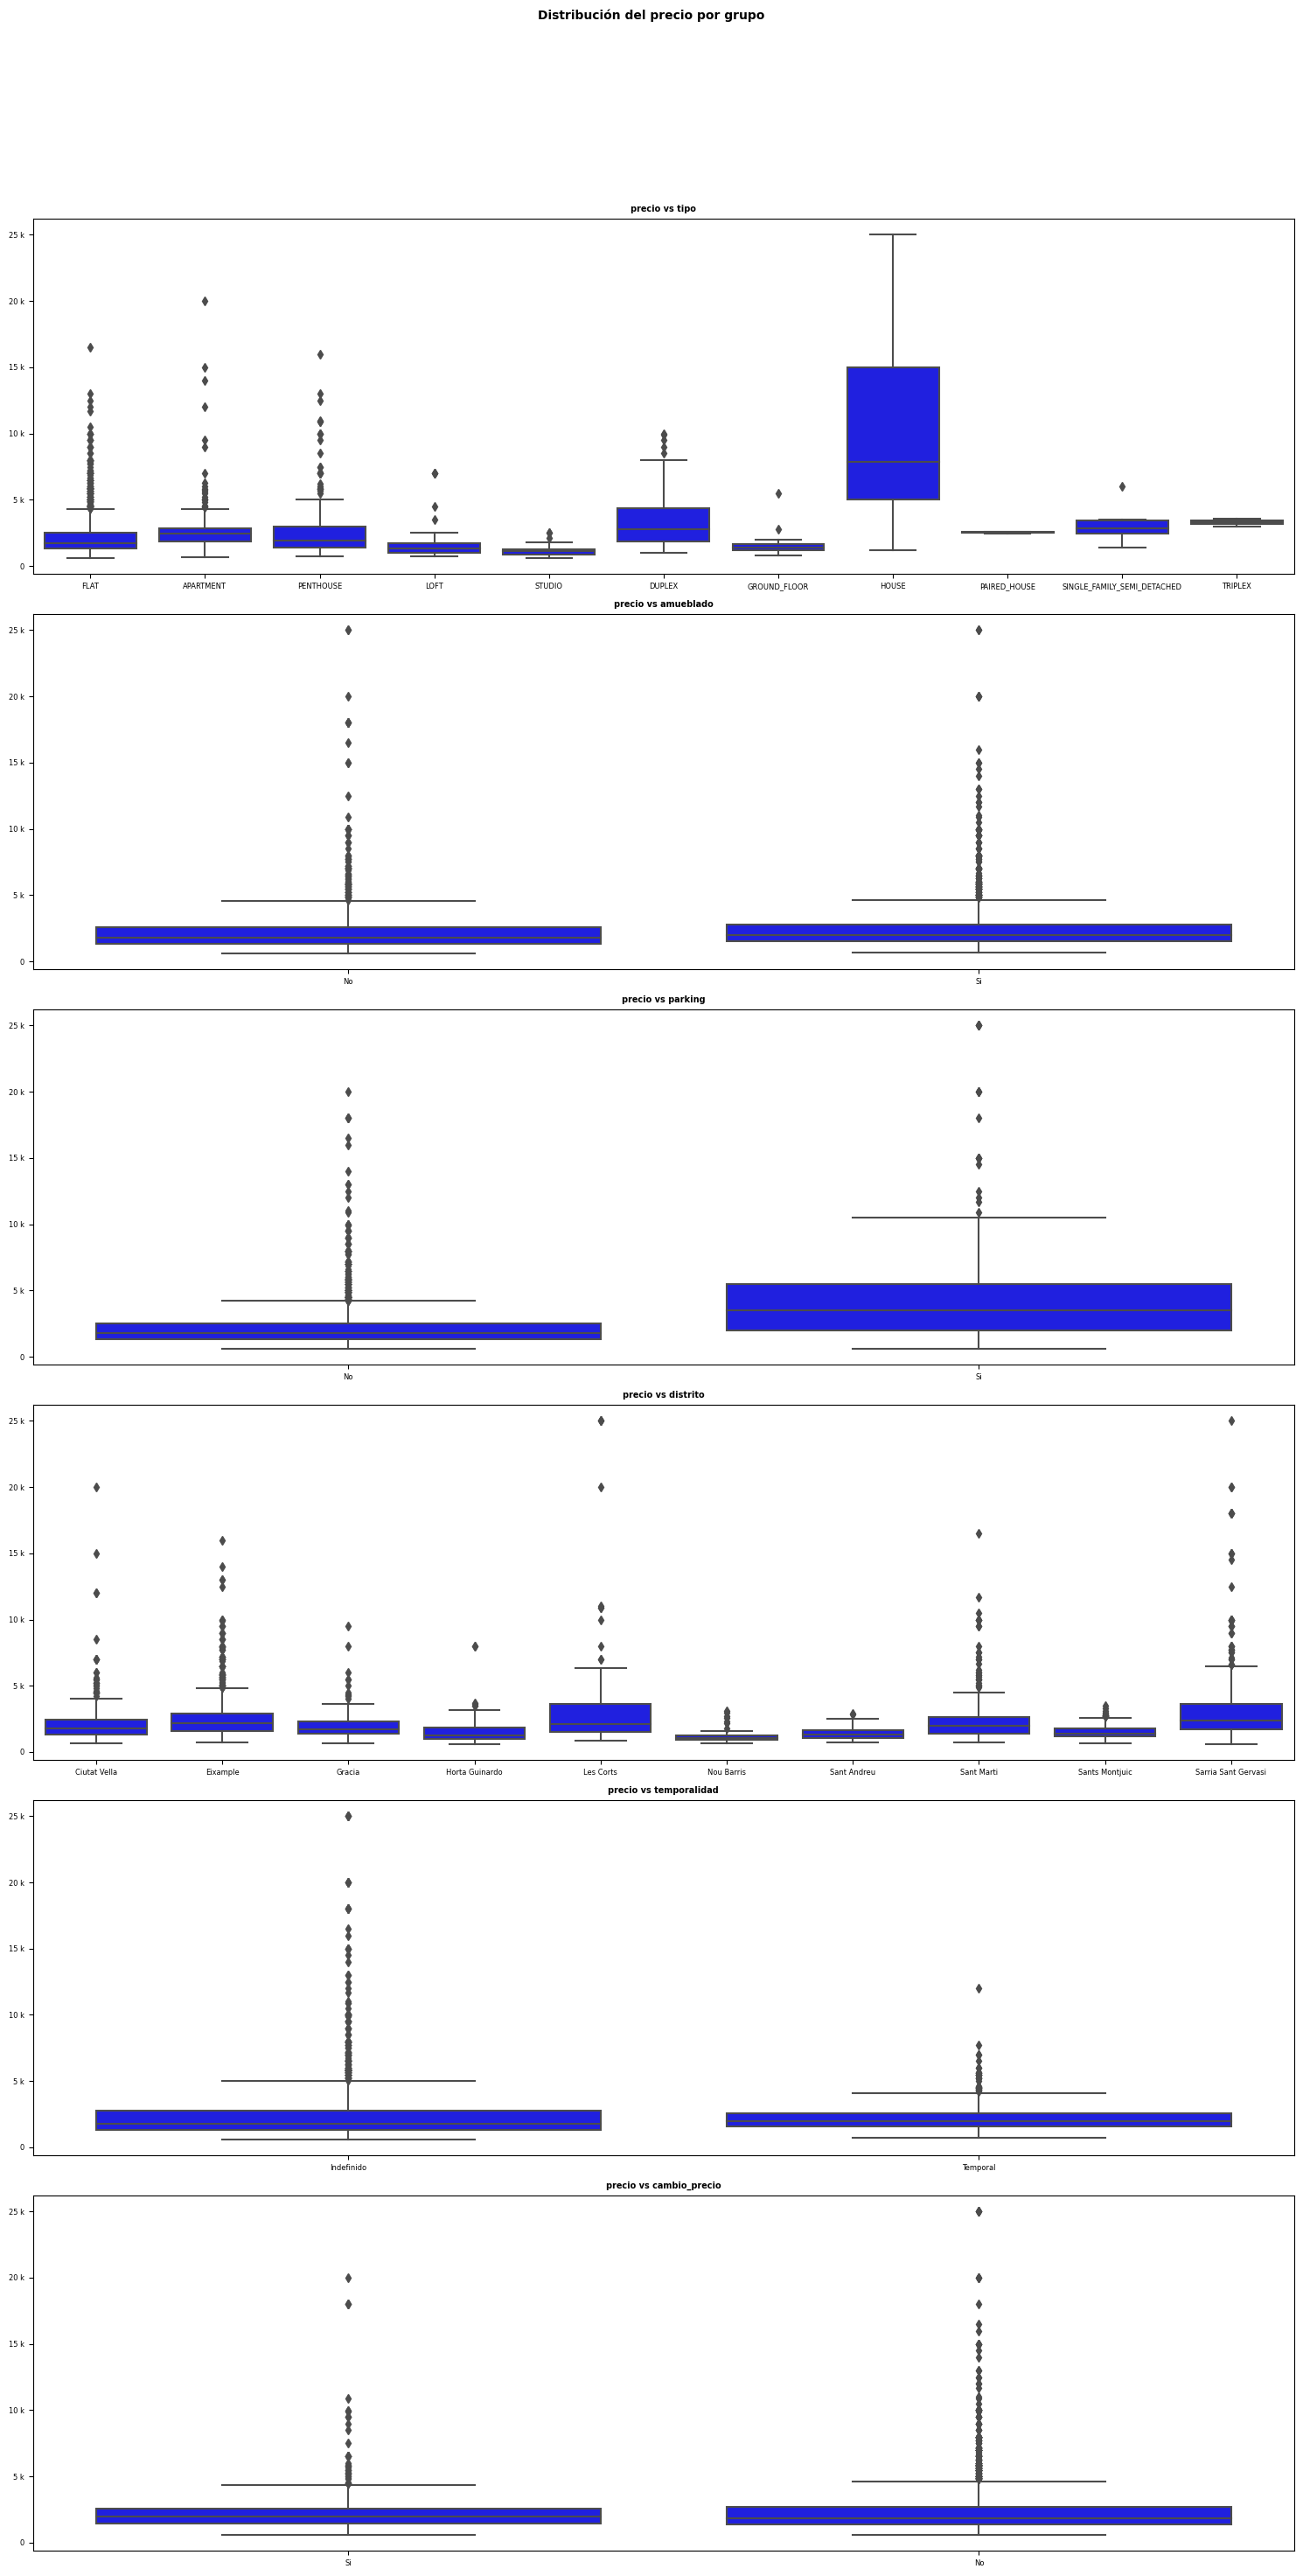

In [22]:
# Gráfico relación entre el precio y cada cada variables cualitativas
# ==============================================================================
# Ajustar número de subplots en función del número de columnas
fig, axes = plt.subplots(nrows=6, ncols=1, figsize=(15, 30))
axes = axes.flat
columnas_object = datos.select_dtypes(include=['object']).columns
columnas_object = columnas_object.drop(['id'])

for i, colum in enumerate(columnas_object):
    sns.boxplot(
        x     = colum,
        y     = 'precio',
        data  = datos,
        color = 'blue',
        ax    = axes[i]
    )
    axes[i].set_title(f"precio vs {colum}", fontsize = 7, fontweight = "bold")
    axes[i].yaxis.set_major_formatter(ticker.EngFormatter())
    axes[i].tick_params(labelsize = 6)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")

# Se eliminan los axes vacíos
#for i in [6,7]:
    #fig.delaxes(axes[i])
    
fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Distribución del precio por grupo', fontsize = 10, fontweight = "bold");

Del análisis anterior, concluimos que las variables numéricas tienen todas muchos outliers de manera que emplearemos RobustScaler en el preprocesado. Para las variables cualitativas aplicaremos OneHotEncoder para binarizarlas.

## DIVISION TRAIN TEST

In [23]:
# Reparto de datos en train y test
# ==============================================================================
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
                                        datos.drop(['precio','id'], axis = 'columns'),
                                        datos['precio'],
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )

In [24]:
print("Partición de entrenamento")
print("-----------------------")
print(y_train.describe())

Partición de entrenamento
-----------------------
count     2980.000000
mean      2403.625839
std       1944.583407
min        600.000000
25%       1395.000000
50%       1895.000000
75%       2702.250000
max      25000.000000
Name: precio, dtype: float64


In [25]:

print("Partición de test")
print("-----------------------")
print(y_test.describe())

Partición de test
-----------------------
count      745.000000
mean      2345.676510
std       1947.860357
min        600.000000
25%       1350.000000
50%       1900.000000
75%       2618.000000
max      25000.000000
Name: precio, dtype: float64


## ALGORITMOS

### KNN

In [26]:
from sklearn.model_selection import RandomizedSearchCV, RepeatedKFold
from sklearn.neighbors import KNeighborsRegressor


# Pipeline: preprocesado + modelo
# ==============================================================================
# Identificación de columnas numéricas y catégoricas
numeric_cols = X_train.select_dtypes(include=['float64', 'int64']).columns.to_list()
cat_cols = X_train.select_dtypes(include=['object']).columns.to_list()


# Transformaciones para las variables numéricas
numeric_transformer = Pipeline(
                        steps=[('scaler', RobustScaler())]
                      )

# Transformaciones para las variables categóricas
categorical_transformer = Pipeline(
                            steps=[('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))]
                          )

preprocessor = ColumnTransformer(
                    transformers=[
                        ('numeric', numeric_transformer, numeric_cols),
                        ('cat', categorical_transformer, cat_cols)
                    ],
                    remainder='passthrough',
                    verbose_feature_names_out = False
               ).set_output(transform="pandas")

# Se combinan los pasos de preprocesado y el modelo en un mismo pipeline.
pipe_KNN= Pipeline([('preprocessing', preprocessor),
                 ('modelo', KNeighborsRegressor())])

# Optimización de hiperparámetros
# ==============================================================================
# Espacio de búsqueda de cada hiperparámetro
param_distributions = {'modelo__n_neighbors': np.linspace(1, 100, 500, dtype=int)}

# Búsqueda random grid
grid= RandomizedSearchCV(
        estimator  = pipe_KNN,
        param_distributions = param_distributions,
        n_iter     = 20,
        scoring    = 'neg_root_mean_squared_error',
        n_jobs     = multiprocessing.cpu_count() - 1,
        cv         = RepeatedKFold(n_splits = 5, n_repeats = 3), 
        refit      = True, 
        verbose    = 0,
        random_state = 123,
        return_train_score = True
       )

grid.fit(X = X_train, y = y_train)

# Resultados del grid
# ==============================================================================
resultados = pd.DataFrame(grid.cv_results_)
resultados.filter(regex = '(param.*|mean_t|std_t)')\
    .drop(columns = 'params')\
    .sort_values('mean_test_score', ascending = False)\
    .head(1)

,param_modelo__n_neighbors,mean_test_score,std_test_score,mean_train_score,std_train_score
12,7,-1239.840452,102.496479,-1069.894747,29.168935


/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexes/base.py:6999: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  return Index(sequences[0], name=names)


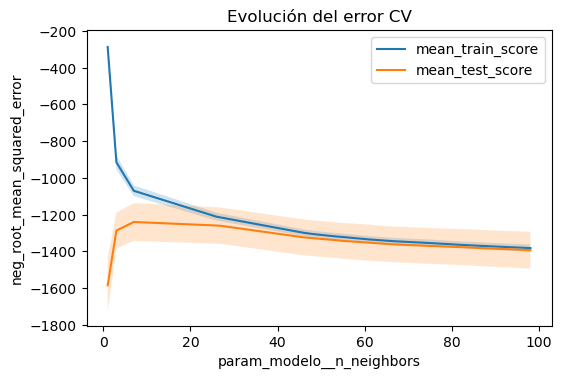

In [27]:
# Gráfico resultados validación cruzada para cada hiperparámetro
# ------------------------------------------------------------------------------
fig, ax = plt.subplots(figsize=(6, 3.84))
hiperparametro = 'param_modelo__n_neighbors'
resultados = resultados.sort_values(hiperparametro, ascending = False)
metrica    = grid.scoring

resultados.plot(hiperparametro, 'mean_train_score', ax=ax)
resultados.plot(hiperparametro, 'mean_test_score', ax=ax)
ax.fill_between(resultados[hiperparametro].astype(int),
                resultados['mean_train_score'] + resultados['std_train_score'],
                resultados['mean_train_score'] - resultados['std_train_score'],
                alpha=0.2)
ax.fill_between(resultados[hiperparametro].astype(int),
                resultados['mean_test_score'] + resultados['std_test_score'],
                resultados['mean_test_score'] - resultados['std_test_score'],
                alpha=0.2)
ax.legend()
ax.set_title('Evolución del error CV')
ax.set_ylabel(metrica);

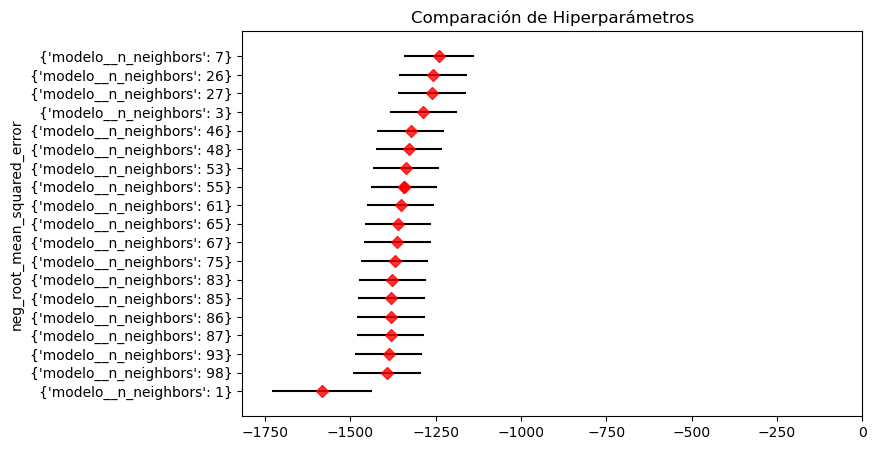

In [28]:
fig, ax = plt.subplots(figsize=(8, 5))
resultados = resultados.sort_values('mean_test_score', ascending = True)
ax.barh(
    [str(d) for d in resultados['params']],
    resultados['mean_test_score'],
    xerr=resultados['std_test_score'],
    align='center',
    alpha=0
)
ax.plot(
    resultados['mean_test_score'],
    [str(d) for d in resultados['params']],
    marker="D",
    linestyle="",
    alpha=0.8,
    color="r"
)
ax.set_title('Comparación de Hiperparámetros')
ax.set_ylabel(metrica);

In [29]:
# Error de test del modelo final
# ==============================================================================
from sklearn.metrics import mean_squared_error

modelo_final_knn = grid.best_estimator_
predicciones = modelo_final_knn.predict(X = X_test)
rmse_knn = mean_squared_error(
            y_true  = y_test,
            y_pred  = predicciones,
            squared = False)
print(f"El error (rmse) de test es: {round(rmse_knn,2)}")

El error (rmse) de test es: 1072.56


In [30]:
# Error de test del modelo final
# ==============================================================================
from sklearn.metrics import r2_score

r2_knn = r2_score(
            y_true  = y_test,
            y_pred  = predicciones)
print(f"El coeficiente de determinación (r2) de test es: {round(r2_knn,2)}")

El coeficiente de determinación (r2) de test es: 0.7


In [31]:
score =round(modelo_final_knn.score(X_train,y_train),2)
print('Metrica del modelo', score)
score_pred = round(modelo_final_knn.score(X_test,y_test),2)
print('Metrica en test', score_pred)

Metrica del modelo 0.7
Metrica en test 0.7


In [32]:
from sklearn.metrics import mean_absolute_percentage_error

mape_knn=mean_absolute_percentage_error(
            y_true  = y_test,
            y_pred  = predicciones)
print(f"El error (mape) de test es: {round(mape_knn,2)}")

El error (mape) de test es: 0.26


### Regresión Lineal Ridge y Lasso

In [33]:
from sklearn.model_selection import RandomizedSearchCV, RepeatedKFold
from sklearn.linear_model import Ridge

# Pipeline: preprocesado + modelo
# ==============================================================================
# Identificación de columnas numéricas y catégoricas
numeric_cols = X_train.select_dtypes(include=['float64', 'int']).columns.to_list()
cat_cols = X_train.select_dtypes(include=['object']).columns.to_list()


# Transformaciones para las variables numéricas
numeric_transformer = Pipeline(
                        steps=[('scaler', RobustScaler())]
                      )

# Transformaciones para las variables categóricas
categorical_transformer = Pipeline(
                            steps=[('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))]
                          )

preprocessor = ColumnTransformer(
                    transformers=[
                        ('numeric', numeric_transformer, numeric_cols),
                        ('cat', categorical_transformer, cat_cols)
                    ],
                    remainder='passthrough',
                    verbose_feature_names_out = False
               ).set_output(transform="pandas")

# Se combinan los pasos de preprocesado y el modelo en un mismo pipeline.
pipe_lm = Pipeline([('preprocessing', preprocessor),
                 ('modelo', Ridge())])

# Optimización de hiperparámetros
# ==============================================================================
# Espacio de búsqueda de cada hiperparámetro
param_distributions = {'modelo__alpha': np.logspace(-5, 5, 500)}

# Búsqueda random grid
grid = RandomizedSearchCV(
        estimator  = pipe_lm,
        param_distributions = param_distributions,
        n_iter     = 20,
        scoring    = 'neg_root_mean_squared_error',
        n_jobs     = multiprocessing.cpu_count() - 1,
        cv         = RepeatedKFold(n_splits = 5, n_repeats = 3), 
        refit      = True, 
        verbose    = 0,
        random_state = 123,
        return_train_score = True
       )

grid.fit(X = X_train, y = y_train)

# Resultados del grid
# ==============================================================================
resultados = pd.DataFrame(grid.cv_results_)
resultados.filter(regex = '(param.*|mean_t|std_t)')\
    .drop(columns = 'params')\
    .sort_values('mean_test_score', ascending = False)\
    .head(1)

,param_modelo__alpha,mean_test_score,std_test_score,mean_train_score,std_train_score
4,13.560151,-1227.691602,113.052656,-1213.810611,29.142645


/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexes/base.py:6999: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  return Index(sequences[0], name=names)


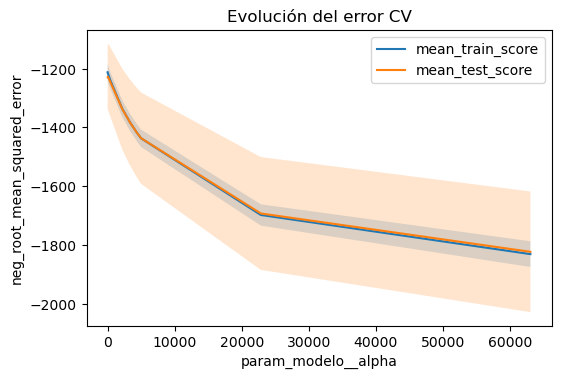

In [34]:
# Gráfico resultados validación cruzada para cada hiperparámetro
# ==============================================================================
fig, ax = plt.subplots(figsize=(6, 3.84))
hiperparametro = 'param_modelo__alpha'
resultados = resultados.sort_values(hiperparametro, ascending = False)
metrica    = grid.scoring

resultados.plot(hiperparametro, 'mean_train_score', ax=ax)
resultados.plot(hiperparametro, 'mean_test_score', ax=ax)
ax.fill_between(resultados[hiperparametro].astype(int),
                resultados['mean_train_score'] + resultados['std_train_score'],
                resultados['mean_train_score'] - resultados['std_train_score'],
                alpha=0.2)
ax.fill_between(resultados[hiperparametro].astype(int),
                resultados['mean_test_score'] + resultados['std_test_score'],
                resultados['mean_test_score'] - resultados['std_test_score'],
                alpha=0.2)
ax.legend()
ax.set_title('Evolución del error CV')
ax.set_ylabel(metrica);


In [35]:
# Error de test del modelo final
# ==============================================================================
modelo_final_lm = grid.best_estimator_
predicciones = modelo_final_lm.predict(X = X_test)
rmse_lm = mean_squared_error(
            y_true  = y_test,
            y_pred  = predicciones,
            squared = False)
print(f"El error (rmse) de test es: {round(rmse_lm,2)}")

El error (rmse) de test es: 1202.49


In [36]:
# Error de test del modelo final
# ==============================================================================
from sklearn.metrics import r2_score

r2_lm = r2_score(
            y_true  = y_test,
            y_pred  = predicciones)
print(f"El coeficiente de determinación (r2) de test es: {round(r2_lm,2)}")

El coeficiente de determinación (r2) de test es: 0.62


In [37]:
score =round(modelo_final_lm.score(X_train,y_train),2)
print('Metrica del modelo', score)
score_pred = round(modelo_final_lm.score(X_test,y_test),2)
print('Metrica en test', score_pred)

Metrica del modelo 0.61
Metrica en test 0.62


In [38]:
from sklearn.metrics import mean_absolute_percentage_error

mape_lm=mean_absolute_percentage_error(
            y_true  = y_test,
            y_pred  = predicciones)
print(f"El error (mape) de test es: {round(mape_lm,2)}")

El error (mape) de test es: 0.29


### Random Forest

In [39]:
from sklearn.model_selection import RandomizedSearchCV, RepeatedKFold
from sklearn.ensemble import RandomForestRegressor

# Pipeline: preprocesado + modelo
# ==============================================================================
# Identificación de columnas numéricas y catégoricas
numeric_cols = X_train.select_dtypes(include=['float64', 'int']).columns.to_list()
cat_cols = X_train.select_dtypes(include=['object', 'category']).columns.to_list()


# Transformaciones para las variables numéricas
numeric_transformer = Pipeline(
                        steps=[('scaler', RobustScaler())]
                      )

# Transformaciones para las variables categóricas
categorical_transformer = Pipeline(
                            steps=[('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))]
                          )

preprocessor = ColumnTransformer(
                    transformers=[
                        ('numeric', numeric_transformer, numeric_cols),
                        ('cat', categorical_transformer, cat_cols)
                    ],
                    remainder='passthrough',
                    verbose_feature_names_out = False
               ).set_output(transform="pandas")

# Se combinan los pasos de preprocesado y el modelo en un mismo pipeline.
pipe_rf= Pipeline([('preprocessing', preprocessor),
                 ('modelo', RandomForestRegressor())])

# Optimización de hiperparámetros
# ==============================================================================
# Espacio de búsqueda de cada hiperparámetro

param_distributions = {
    'modelo__n_estimators': [50, 100, 1000, 2000],
    'modelo__max_features': [3, 5, 7, 1.0],
    'modelo__max_depth'   : [None, 3, 5, 10, 20]
}

# Búsqueda random grid
grid = RandomizedSearchCV(
        estimator  = pipe_rf,
        param_distributions = param_distributions,
        n_iter     = 20,
        scoring    = 'neg_root_mean_squared_error',
        n_jobs     = multiprocessing.cpu_count() - 1,
        cv         = RepeatedKFold(n_splits = 5, n_repeats = 3),
        refit      = True, 
        verbose    = 0,
        random_state = 123,
        return_train_score = True
       )

grid.fit(X = X_train, y = y_train)

# Resultados del grid
# ==============================================================================
resultados = pd.DataFrame(grid.cv_results_)
resultados.filter(regex = '(param.*|mean_t|std_t)')\
    .drop(columns = 'params')\
    .sort_values('mean_test_score', ascending = False)\
    .head(1)


/opt/anaconda3/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


,param_modelo__n_estimators,param_modelo__max_features,param_modelo__max_depth,mean_test_score,std_test_score,mean_train_score,std_train_score
2,2000,7,10,-1195.716046,109.779819,-786.244818,14.646197


In [41]:
# Error de test del modelo final
# ==============================================================================
modelo_final_rf= grid.best_estimator_
predicciones = modelo_final_rf.predict(X = X_test)
rmse_rf = mean_squared_error(
            y_true  = y_test,
            y_pred  = predicciones,
            squared = False)
print(f"El error (rmse) de test es: {round(rmse_rf,2)}")

El error (rmse) de test es: 1065.53


In [42]:
# Error de test del modelo final
# ==============================================================================
from sklearn.metrics import r2_score

r2_rf = r2_score(
            y_true  = y_test,
            y_pred  = predicciones)
print(f"El coeficiente de determinación (r2) de test es: {round(r2_rf,2)}")

El coeficiente de determinación (r2) de test es: 0.7


In [43]:
score =round(modelo_final_rf.score(X_train,y_train),2)
print('Metrica del modelo', score)
score_pred = round(modelo_final_rf.score(X_test,y_test),2)
print('Metrica en test', score_pred)

Metrica del modelo 0.83
Metrica en test 0.7


In [44]:
from sklearn.metrics import mean_absolute_percentage_error

mape_rf=mean_absolute_percentage_error(
            y_true  = y_test,
            y_pred  = predicciones)
print(f"El error (mape) de test es: {round(mape_rf,2)}")

El error (mape) de test es: 0.26


### Gradient Boosting Tree

In [45]:
from sklearn.model_selection import RandomizedSearchCV, RepeatedKFold
from sklearn.ensemble import GradientBoostingRegressor

# Pipeline: preprocesado + modelo
# ==============================================================================
# Identificación de columnas numéricas y catégoricas
numeric_cols = X_train.select_dtypes(include=['float64', 'int']).columns.to_list()
cat_cols = X_train.select_dtypes(include=['object', 'category']).columns.to_list()


# Transformaciones para las variables numéricas
numeric_transformer = Pipeline(
                        steps=[('scaler', RobustScaler())]
                      )

# Transformaciones para las variables categóricas
categorical_transformer = Pipeline(
                            steps=[('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))]
                          )

preprocessor = ColumnTransformer(
                    transformers=[
                        ('numeric', numeric_transformer, numeric_cols),
                        ('cat', categorical_transformer, cat_cols)
                    ],
                    remainder='passthrough',
                    verbose_feature_names_out = False
               ).set_output(transform="pandas")

# Se combinan los pasos de preprocesado y el modelo en un mismo pipeline.
pipe_gbm = Pipeline([('preprocessing', preprocessor),
                 ('modelo', GradientBoostingRegressor())])

# Optimización de hiperparámetros
# ==============================================================================
# Espacio de búsqueda de cada hiperparámetro

param_distributions = {
    'modelo__n_estimators': [50, 100, 1000, 2000],
    'modelo__max_features': [3, 5, 7, 1.0],
    'modelo__max_depth'   : [None, 3, 5, 10, 20],
    'modelo__subsample'   : [0.5,0.7, 1]
}

# Búsqueda random grid
grid = RandomizedSearchCV(
        estimator  = pipe_gbm,
        param_distributions = param_distributions,
        n_iter     = 20,
        scoring    = 'neg_root_mean_squared_error',
        n_jobs     = multiprocessing.cpu_count() - 1,
        cv         = RepeatedKFold(n_splits = 5, n_repeats = 3),
        refit      = True, 
        verbose    = 0,
        random_state = 123,
        return_train_score = True
       )

grid.fit(X = X_train, y = y_train)

# Resultados del grid
# ==============================================================================
resultados = pd.DataFrame(grid.cv_results_)
resultados.filter(regex = '(param.*|mean_t|std_t)')\
    .drop(columns = 'params')\
    .sort_values('mean_test_score', ascending = False)\
    .head(1)

,param_modelo__subsample,param_modelo__n_estimators,param_modelo__max_features,param_modelo__max_depth,mean_test_score,std_test_score,mean_train_score,std_train_score
14,1,100,1.0,3,-1197.519288,169.220713,-944.800616,31.624572


In [46]:
# Error de test del modelo final
# ==============================================================================
modelo_final_gbm = grid.best_estimator_
predicciones = modelo_final_gbm.predict(X = X_test)
rmse_gbm = mean_squared_error(
            y_true  = y_test,
            y_pred  = predicciones,
            squared = False)
print(f"El error (rmse) de test es: {round(rmse_gbm,2)}")


El error (rmse) de test es: 1094.23


In [47]:
# Error de test del modelo final
# ==============================================================================
from sklearn.metrics import r2_score

r2_gbm = r2_score(
            y_true  = y_test,
            y_pred  = predicciones)
print(f"El coeficiente de determinación (r2) de test es: {round(r2_gbm,2)}")

El coeficiente de determinación (r2) de test es: 0.68


In [48]:
score =round(modelo_final_gbm.score(X_train,y_train),2)
print('Metrica del modelo', score)
score_pred = round(modelo_final_gbm.score(X_test,y_test),2)
print('Metrica en test', score_pred)

Metrica del modelo 0.75
Metrica en test 0.68


In [49]:
from sklearn.metrics import mean_absolute_percentage_error

mape_gbm=mean_absolute_percentage_error(
            y_true  = y_test,
            y_pred  = predicciones)
print(f"El error (mape) de test es: {round(mape_gbm,2)}")

El error (mape) de test es: 0.26


## Comparación

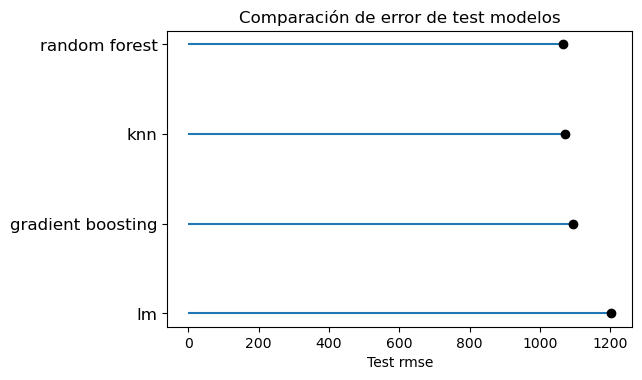

In [50]:
error_modelos = pd.DataFrame({
                        'modelo': ['knn', 'lm', 'random forest', 'gradient boosting'],
                        'rmse': [rmse_knn, rmse_lm, rmse_rf, rmse_gbm]
                     })
error_modelos = error_modelos.sort_values('rmse', ascending=False)

fig, ax = plt.subplots(figsize=(6, 3.84))
ax.hlines(error_modelos.modelo, xmin=0, xmax=error_modelos.rmse)
ax.plot(error_modelos.rmse, error_modelos.modelo, "o", color='black')
ax.tick_params(axis='y', which='major', labelsize=12)
ax.set_title('Comparación de error de test modelos'),
ax.set_xlabel('Test rmse');

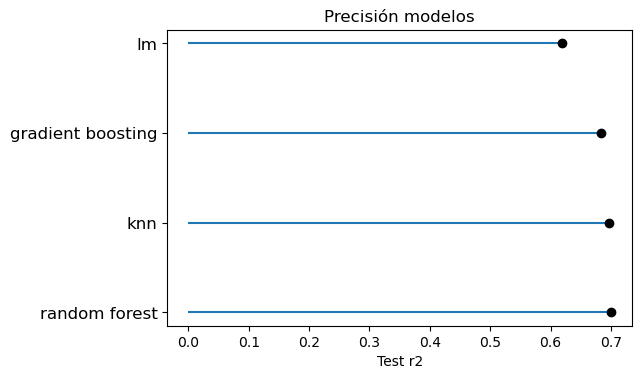

In [51]:
precisión_modelos = pd.DataFrame({
                        'modelo': ['knn', 'lm', 'random forest', 'gradient boosting'],
                        'r2': [r2_knn, r2_lm, r2_rf, r2_gbm]
                     })
precisión_modelos = precisión_modelos.sort_values('r2', ascending=False)

fig, ax = plt.subplots(figsize=(6, 3.84))
ax.hlines(precisión_modelos.modelo, xmin=0, xmax=precisión_modelos.r2)
ax.plot(precisión_modelos.r2, precisión_modelos.modelo, "o", color='black')
ax.tick_params(axis='y', which='major', labelsize=12)
ax.set_title('Precisión modelos'),
ax.set_xlabel('Test r2');

## PREDICCIONES CON EL MEJOR MODELO

Por las métricas obtenidas anteriormente escogemos Random Forest

In [52]:
predicciones=modelo_final_rf.predict(X_test)
predicciones

array([ 2036.06986259,  2237.45838333,  2516.32937074,  1331.42398587,
        1939.74194927,  1692.85584567,  1308.50647495,  1408.50463236,
        2422.07058664,  2692.26145552,  1579.39123179,  2264.35647738,
        1998.43540683,  1625.97949492,  2676.11494587,  1416.41338571,
        1315.28911071,  3355.7001123 ,  2405.85103506,  7167.65239193,
        3281.27919768,  1797.12600476,  1519.76111111,  2374.29776781,
        4114.92716225,  2454.89228399,  1993.37829077,  2728.69965847,
        1609.94952038,  1359.72428544,  3972.86176186,  2461.91657927,
        3950.60481276,  1574.34682292,  3795.64848592,  2115.47260805,
        1485.11645499,  2916.83693163,  4122.96613012,  2900.78726822,
        2516.25022434,  2062.87303062,  2092.76296881,  2375.70761336,
        2037.45712868,  4277.26036828,  1751.35524298,  2087.20320725,
        2462.21721065,  1623.69530783,  3118.79751311,  1476.21760485,
        4555.79104851,  1522.86037985,  1535.52851709,  2871.11760949,
      

In [53]:
# Se crea un dataframe con las predicciones y el valor real
df_predicciones = pd.DataFrame({'precio' : y_test, 'prediccion' : predicciones})
df_predicciones

,precio,prediccion
219,1600,2036.069863
1545,1650,2237.458383
149,2400,2516.329371
1772,1625,1331.423986
1999,1500,1939.741949
1863,1395,1692.855846
2423,1100,1308.506475
2415,870,1408.504632
1116,3100,2422.070587
3274,1990,2692.261456


In [54]:
df_predicciones.describe()

,precio,prediccion
count,745.000000,745.000000
mean,2345.676510,2368.879767
std,1947.860357,1464.329985
min,600.000000,1111.619787
25%,1350.000000,1598.660907
50%,1900.000000,2003.445356
75%,2618.000000,2585.383925
max,25000.000000,16245.531304


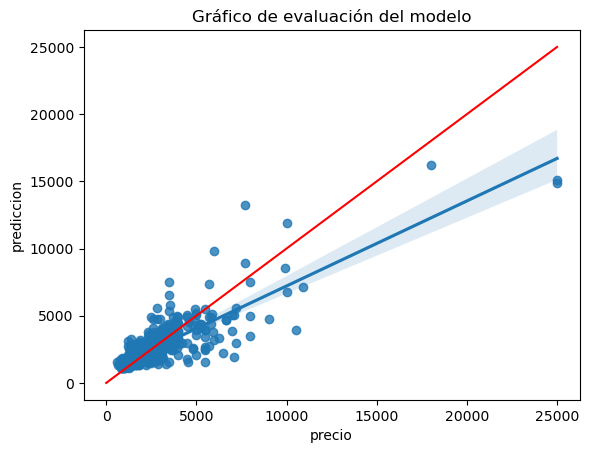

In [55]:
g=sns.regplot(data=df_predicciones,x=df_predicciones['precio'],y=df_predicciones['prediccion'])
X_plot = np.linspace(0, 25000, 25000)
Y_plot = X_plot
plt.title('Gráfico de evaluación del modelo')
plt.plot(X_plot, Y_plot, color='r')
plt.show()

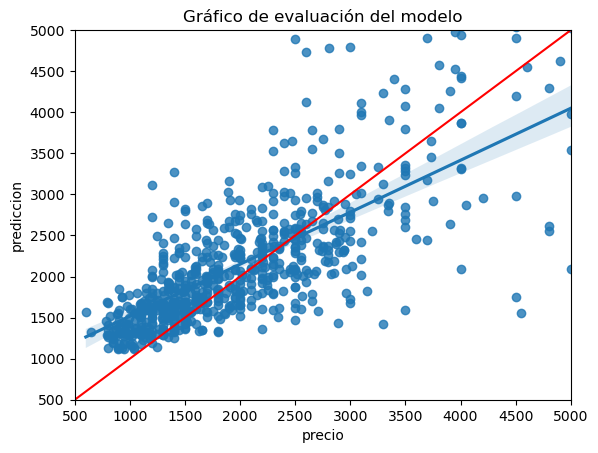

In [56]:
g1=sns.regplot(data=df_predicciones,x=df_predicciones['precio'],y=df_predicciones['prediccion'])
g1.set(ylim=(500, 5000),xlim=(500, 5000))
X_plot = np.linspace(0, 25000, 25000)
Y_plot = X_plot
plt.title('Gráfico de evaluación del modelo')
plt.plot(X_plot, Y_plot, color='r')
plt.show()

In [57]:
Results=round(pd.DataFrame(
    {'KNN' : [r2_knn,rmse_knn,mape_knn],
'Linear Model Ridge' : [r2_lm,rmse_lm,mape_lm],
'Random Forest' :[r2_rf,rmse_rf,mape_rf],
'XGBoost' :[r2_gbm,rmse_gbm,mape_gbm]},
    index = ['r2', 'rmse','mape']),2)
Results

,KNN,Linear Model Ridge,Random Forest,XGBoost
r2,0.70,0.62,0.70,0.68
rmse,1072.56,1202.49,1065.53,1094.23
mape,0.26,0.29,0.26,0.26
